In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [13]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [17]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [18]:
import torch

In [38]:
N = torch.zeros((27,27), dtype=torch.int32)

In [39]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [42]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

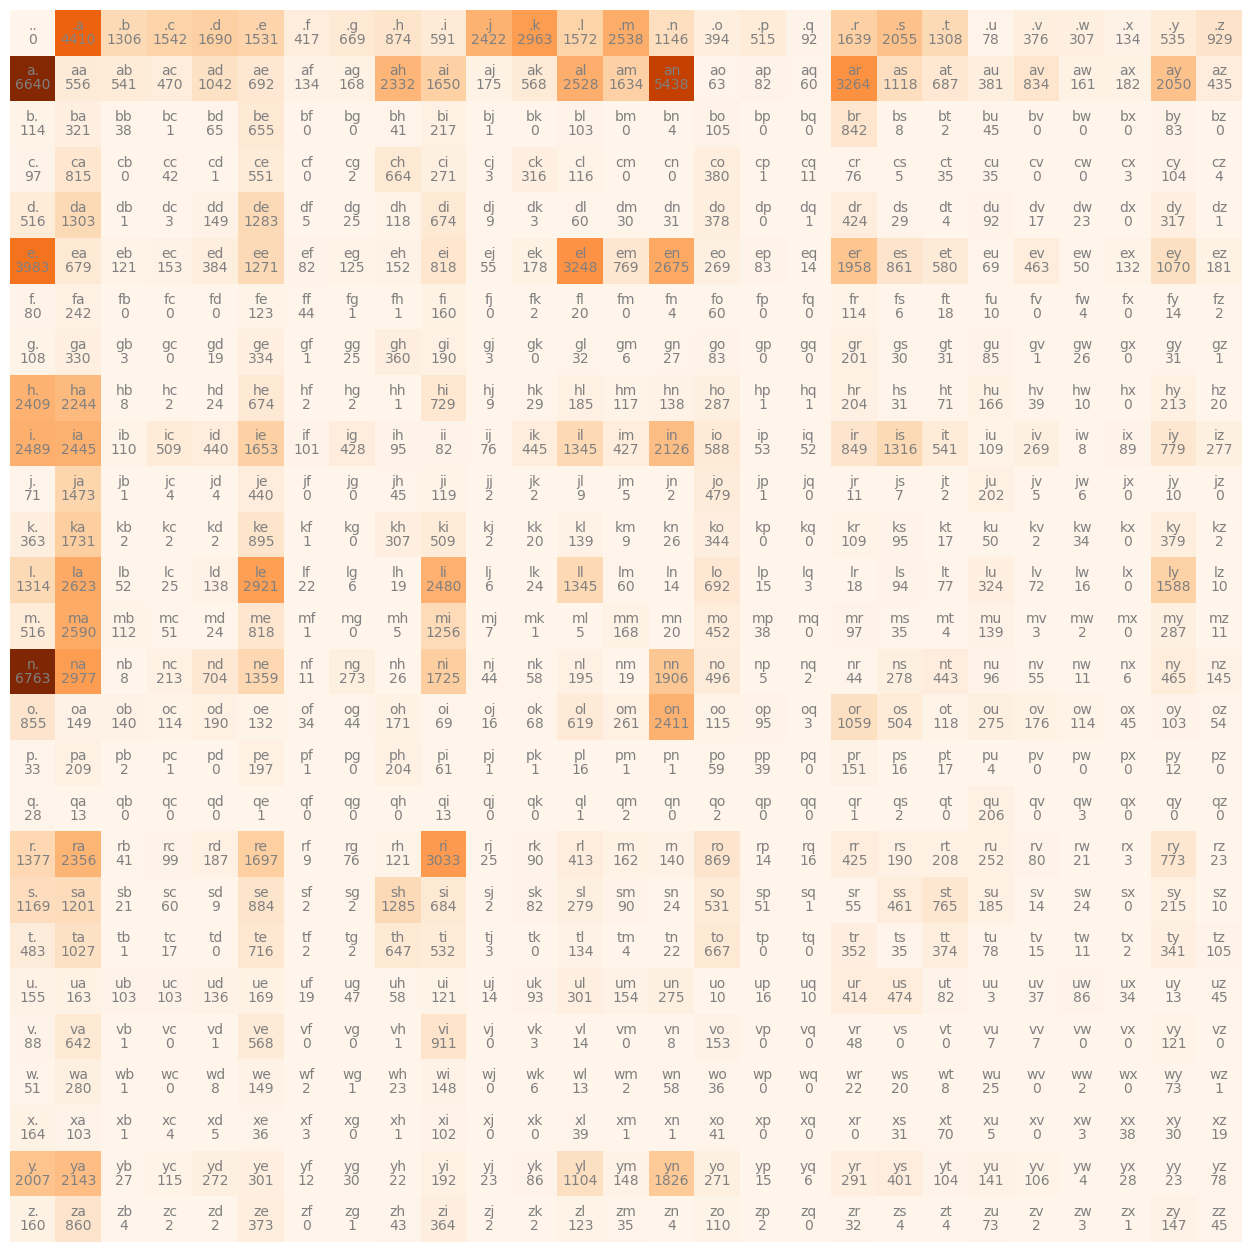

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Oranges')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.axis('off');

In [51]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [53]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [63]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [85]:
P = (N+1).float() # make sure no 0 value in probability matrix
P /= P.sum(1, keepdim=True) # keepdim must be true otherwise it will give one dimentional array as a result

In [86]:
P[0]

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])

In [87]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        
        p = P[ix]
#         p = N[ix].float()
#         p = p / p.sum()
#         p = torch.ones(27) / 27.0 # make it uniformly distributed
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])

        if ix == 0:
            break 

    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [88]:
# log(a*b*c) = log(a) + log(b) + log(c)

In [89]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
#         print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [91]:
# create the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [92]:
xs

tensor([ 0,  5, 13, 13,  1])

In [93]:
ys

tensor([ 5, 13, 13,  1,  0])

In [97]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [98]:
xenc.shape

torch.Size([5, 27])

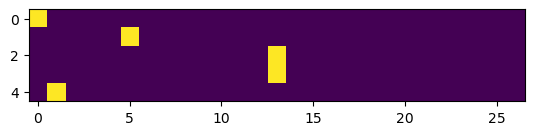

In [99]:
plt.imshow(xenc)

In [101]:
W = torch.randn((27,27))
xenc @ W

tensor([[ 0.7781,  0.0605,  0.2363, -0.1392, -1.5575, -0.2271,  2.0304, -0.9725,
         -0.3146,  2.1362,  0.5158, -0.2069,  1.4120, -1.6745,  1.1989, -0.9168,
         -0.4750,  1.2128, -1.4851, -0.5188, -0.2085,  0.3951,  0.3495, -0.0257,
          0.3243,  0.3788, -0.6517],
        [ 0.5523,  0.9686,  0.6925,  0.5011, -0.7325, -0.5293,  0.3072,  0.7427,
          0.4646, -1.4840,  0.7536,  1.5085,  0.4598,  0.0446, -0.9380,  1.2596,
          1.1690, -1.2194, -0.2505, -1.6908, -0.3493,  0.3908,  0.2551,  2.9827,
         -0.1394, -0.6767,  1.3087],
        [ 0.2667, -0.4449,  1.7756, -2.2061, -0.1537,  0.0040, -0.4613, -0.2295,
         -0.1433, -1.0591, -1.2515,  0.0128, -1.2631,  2.1925, -1.6446,  0.2310,
          0.4093, -0.5283, -0.1996,  0.6436,  1.0035,  1.2146,  0.0989, -0.3487,
          1.6128, -1.1815, -2.6755],
        [ 0.2667, -0.4449,  1.7756, -2.2061, -0.1537,  0.0040, -0.4613, -0.2295,
         -0.1433, -1.0591, -1.2515,  0.0128, -1.2631,  2.1925, -1.6446,  0.2310

In [102]:
(xenc @ W)[3, 13]

tensor(2.1925)

In [103]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
W[:, 13]

tensor([-1.6745,  0.4450,  0.8017, -0.0445,  1.1918,  0.0446,  0.4419, -1.4327,
         0.4496, -0.2363,  1.6010, -2.6980,  0.1528,  2.1925, -1.7432,  1.6011,
         1.5476,  1.5487,  0.8527,  1.0711,  0.3566, -0.5677,  0.2594, -1.2692,
         0.6699, -0.5601,  0.2336])

In [106]:
(xenc[3] * W[:,13]).sum()

tensor(2.1925)

In [107]:
(xenc @ W)

tensor([[ 0.7781,  0.0605,  0.2363, -0.1392, -1.5575, -0.2271,  2.0304, -0.9725,
         -0.3146,  2.1362,  0.5158, -0.2069,  1.4120, -1.6745,  1.1989, -0.9168,
         -0.4750,  1.2128, -1.4851, -0.5188, -0.2085,  0.3951,  0.3495, -0.0257,
          0.3243,  0.3788, -0.6517],
        [ 0.5523,  0.9686,  0.6925,  0.5011, -0.7325, -0.5293,  0.3072,  0.7427,
          0.4646, -1.4840,  0.7536,  1.5085,  0.4598,  0.0446, -0.9380,  1.2596,
          1.1690, -1.2194, -0.2505, -1.6908, -0.3493,  0.3908,  0.2551,  2.9827,
         -0.1394, -0.6767,  1.3087],
        [ 0.2667, -0.4449,  1.7756, -2.2061, -0.1537,  0.0040, -0.4613, -0.2295,
         -0.1433, -1.0591, -1.2515,  0.0128, -1.2631,  2.1925, -1.6446,  0.2310,
          0.4093, -0.5283, -0.1996,  0.6436,  1.0035,  1.2146,  0.0989, -0.3487,
          1.6128, -1.1815, -2.6755],
        [ 0.2667, -0.4449,  1.7756, -2.2061, -0.1537,  0.0040, -0.4613, -0.2295,
         -0.1433, -1.0591, -1.2515,  0.0128, -1.2631,  2.1925, -1.6446,  0.2310

In [108]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0464, 0.0226, 0.0270, 0.0185, 0.0045, 0.0170, 0.1623, 0.0081, 0.0156,
         0.1804, 0.0357, 0.0173, 0.0874, 0.0040, 0.0707, 0.0085, 0.0133, 0.0717,
         0.0048, 0.0127, 0.0173, 0.0316, 0.0302, 0.0208, 0.0295, 0.0311, 0.0111],
        [0.0288, 0.0437, 0.0331, 0.0274, 0.0080, 0.0098, 0.0225, 0.0348, 0.0264,
         0.0038, 0.0352, 0.0749, 0.0263, 0.0173, 0.0065, 0.0584, 0.0534, 0.0049,
         0.0129, 0.0031, 0.0117, 0.0245, 0.0214, 0.3272, 0.0144, 0.0084, 0.0614],
        [0.0307, 0.0151, 0.1387, 0.0026, 0.0201, 0.0236, 0.0148, 0.0187, 0.0204,
         0.0081, 0.0067, 0.0238, 0.0066, 0.2104, 0.0045, 0.0296, 0.0354, 0.0139,
         0.0192, 0.0447, 0.0641, 0.0791, 0.0259, 0.0166, 0.1178, 0.0072, 0.0016],
        [0.0307, 0.0151, 0.1387, 0.0026, 0.0201, 0.0236, 0.0148, 0.0187, 0.0204,
         0.0081, 0.0067, 0.0238, 0.0066, 0.2104, 0.0045, 0.0296, 0.0354, 0.0139,
         0.0192, 0.0447, 0.0641, 0.0791, 0.0259, 0.0166, 0.1178, 0.0072, 0.0016],
        [0.0170, 0.0150,

In [111]:
probs[4].sum()

tensor(1.0000)

In [112]:
xs

tensor([ 0,  5, 13, 13,  1])

In [113]:
ys

tensor([ 5, 13, 13,  1,  0])

In [114]:
# randomly initialize 27 neurons' weights. each neuron receive 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [115]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network : one hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'


In [116]:
probs.shape

torch.Size([5, 27])

In [117]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # input character index
    
    print("----------")
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net: ', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the new to the correct character', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print('===========')
print('average negative log likelihood, i.e. loss = ',nlls.mean().item())

----------
bigram example 1: .e (indexes 0,5)
input to the neural net:  0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the new to the correct character 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
----------
bigram example 2: em (indexes 5,13)
input to the neural net:  5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the new to the correct character 0.0180